In [94]:
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [95]:
S = 100
K = 100
vol = 0.2
r = 0.0
T = 1
d1 = np.log(S/K)+(r + 0.5*vol*vol)/T
d1 = d1/(vol*np.sqrt(T))
d2 = d1 - vol*np.sqrt(T)

price_analytical = S * norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
display(price_analytical)

7.965567455405804

## Calculate the price

In [103]:
def get_price(N=1000,vol=0.2):
    random_num = norm.rvs(size=N)
    ln_return = (r - 0.5*vol*vol)/T + random_num * vol * np.sqrt(T)
    payoff = np.exp(ln_return)*S - K
    payoff_actual = np.where(payoff < 0, 0, payoff)
    #display(pd.Series(payoff_actual).hist())
    return payoff_actual.mean()
print("Price (simulated): ", get_price())

Price (simulated):  8.43258183299388


## I'm interested in how the price can fluctuate around the analytical price
suppose I use only 250 simulations in Excel

7.962410333711488 0.8282428486564777


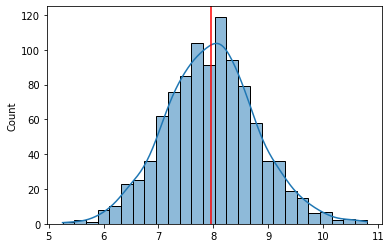

In [115]:
res = []
for i in range(1000):
    res.append(get_price(N=250))
res = pd.Series(res)
print(res.mean(), res.std())

fig, ax = plt.subplots()
sns.histplot(res, kde=True, ax=ax)
_ = ax.axvline(x=price_analytical, color='red')

This distribution means that my simulated price has high change to be as low as 7 or as high as 9.

Let check to see whether the simulated price is normal or not

KS test for non-normalized values KstestResult(statistic=0.9999999999831513, pvalue=0.0)
KS test for normalized values KstestResult(statistic=0.01664121456184814, pvalue=0.9402639004684439)


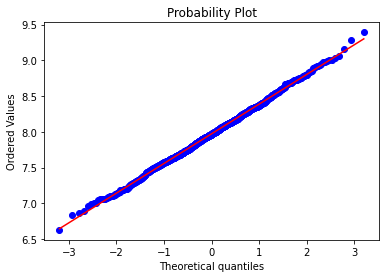

In [99]:
from scipy import stats
fig, ax = plt.subplots()
_ = stats.probplot(res, dist=stats.norm, plot=ax)

# Kolmogrov Smirnov after standardized the variable
print("KS test for non-normalized values",stats.kstest(res, 'norm'))
print("KS test for normalized values",stats.kstest((res-res.mean())/(res.std()), 'norm'))

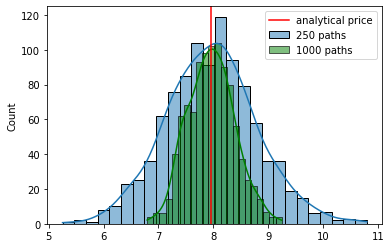

In [119]:
res_1000 = []
for i in range(1000):
    res_1000.append(get_price(N=1000))
res_1000 = pd.Series(res_1000)
# print(res.mean(), res.std())

fig, ax = plt.subplots()
sns.histplot(res, kde=True, ax=ax, label='250 paths')
sns.histplot(res_1000, kde=True, ax=ax, label='1000 paths', color='green')
ax.axvline(x=price_analytical, color='red', label='analytical price')
_ = ax.legend(loc='best')

## See how the spread of the distribution changes with the number of simulations
Seems that the variance is related to the log of N

In [ ]:
list_N = [50, 100, 200, 400, 800, 1600, 3200]

list_std = []
for N in list_N:
    res = []
    for i in range(1000):
        res.append(get_price(N=N))
    res = pd.Series(res)
    list_std.append(res.std())

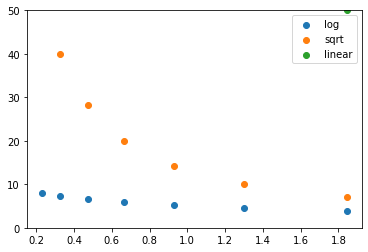

In [113]:
fig, ax = plt.subplots()
ax.scatter(list_std, [np.log(x) for x in list_N], label='log')
ax.scatter(list_std, [np.sqrt(x) for x in list_N], label='sqrt')
ax.scatter(list_std, list_N, label='linear')
ax.legend()
_ = ax.set_ylim((0, 50))